Data Preprocessing
1 Loading the dataset
2 concerting String to float
3 checking null values
4 handling null values
5 statistics
6 checking coreleation
7 Vector Assembler
8 Stanard scaling
9 PCA

In [161]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when
from pyspark.sql.functions import corr
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import StandardScaler, PCA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
spark = SparkSession.builder.appName('Data Preprocessing').getOrCreate()

In [131]:
df = spark.read.csv('D:/DataHub/Admission_Predict.csv', header=True, inferSchema=True)
df.show(10)

+---+---------+-----------+-----------------+---+----+----+--------+----------------+
| Id|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---+---------+-----------+-----------------+---+----+----+--------+----------------+
|  1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|  2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|
|  3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|
|  4|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|  5|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|
|  6|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|
|  7|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75|
|  8|      308|        101|                2|3.0| 4.0| 7.9|       0|            0.68|
|  9|      302|        102|                1|2.0| 1.5|

In [132]:

df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- GRE Score: integer (nullable = true)
 |-- TOEFL Score: integer (nullable = true)
 |-- University Rating: integer (nullable = true)
 |-- SOP: double (nullable = true)
 |-- LOR : double (nullable = true)
 |-- CGPA: double (nullable = true)
 |-- Research: integer (nullable = true)
 |-- Chance of Admit : double (nullable = true)



In [133]:
df = df.select( [col('Id').alias('id')]+ [col(c) for c in df.columns if c != 'Id'])
df.show(10)

+---+---------+-----------+-----------------+---+----+----+--------+----------------+
| id|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---+---------+-----------+-----------------+---+----+----+--------+----------------+
|  1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|  2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|
|  3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|
|  4|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|  5|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|
|  6|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|
|  7|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75|
|  8|      308|        101|                2|3.0| 4.0| 7.9|       0|            0.68|
|  9|      302|        102|                1|2.0| 1.5|

In [134]:
df = df.select([col(c).cast("float").alias(c) for c in df.columns])

df.show(10)

+----+---------+-----------+-----------------+---+----+----+--------+----------------+
|  id|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+----+---------+-----------+-----------------+---+----+----+--------+----------------+
| 1.0|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|            0.92|
| 2.0|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|            0.76|
| 3.0|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|            0.72|
| 4.0|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|             0.8|
| 5.0|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|            0.65|
| 6.0|    330.0|      115.0|              5.0|4.5| 3.0|9.34|     1.0|             0.9|
| 7.0|    321.0|      109.0|              3.0|3.0| 4.0| 8.2|     1.0|            0.75|
| 8.0|    308.0|      101.0|              2.0|3.0| 4.0| 7.9|     0.0|            0.68|
| 9.0|    302.0|      102.0|              1

In [135]:
df.printSchema()

root
 |-- id: float (nullable = true)
 |-- GRE Score: float (nullable = true)
 |-- TOEFL Score: float (nullable = true)
 |-- University Rating: float (nullable = true)
 |-- SOP: float (nullable = true)
 |-- LOR : float (nullable = true)
 |-- CGPA: float (nullable = true)
 |-- Research: float (nullable = true)
 |-- Chance of Admit : float (nullable = true)



In [136]:
#checking the null values
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+---+---------+-----------+-----------------+---+----+----+--------+----------------+
| id|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+---+---------+-----------+-----------------+---+----+----+--------+----------------+
|  0|        0|          0|                0|  0|   0|   0|       0|               0|
+---+---------+-----------+-----------------+---+----+----+--------+----------------+



In [137]:
df.describe().show()

+-------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+
|summary|                id|         GRE Score|      TOEFL Score| University Rating|              SOP|              LOR |              CGPA|           Research|   Chance of Admit |
+-------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+
|  count|               400|               400|              400|               400|              400|               400|               400|                400|                400|
|   mean|             200.5|          316.8075|           107.41|            3.0875|              3.4|            3.4525| 8.598925005197525|             0.5475| 0.7243499991297722|
| stddev|115.61430130683084|11.473646113500488|6.069513777374134|1.1437281298838986|1.006868641

In [138]:
input_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

# Assemble them into a vector column
assembler = VectorAssembler(inputCols=input_columns, outputCol= 'features')
df_vector = assembler.transform(df)
df_vector.show(10)

+----+---------+-----------+-----------------+---+----+----+--------+----------------+--------------------+
|  id|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |            features|
+----+---------+-----------+-----------------+---+----+----+--------+----------------+--------------------+
| 1.0|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|            0.92|[337.0,118.0,4.0,...|
| 2.0|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|            0.76|[324.0,107.0,4.0,...|
| 3.0|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|            0.72|[316.0,104.0,3.0,...|
| 4.0|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|             0.8|[322.0,110.0,3.0,...|
| 5.0|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|            0.65|[314.0,103.0,2.0,...|
| 6.0|    330.0|      115.0|              5.0|4.5| 3.0|9.34|     1.0|             0.9|[330.0,115.0,5.0,...|
| 7.0|    321.0|      109.0|

In [139]:
# Compute the Pearson correlation matrix
corr_matrix = Correlation.corr(df_vector, 'features').head()


# Convert the correlation matrix to an array format
corr_arr = corr_matrix[0].toArray()

#Convert the array to a Pandas DataFrame
corr_df = pd.DataFrame(data=corr_arr, index= input_columns, columns= input_columns)

corr_df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


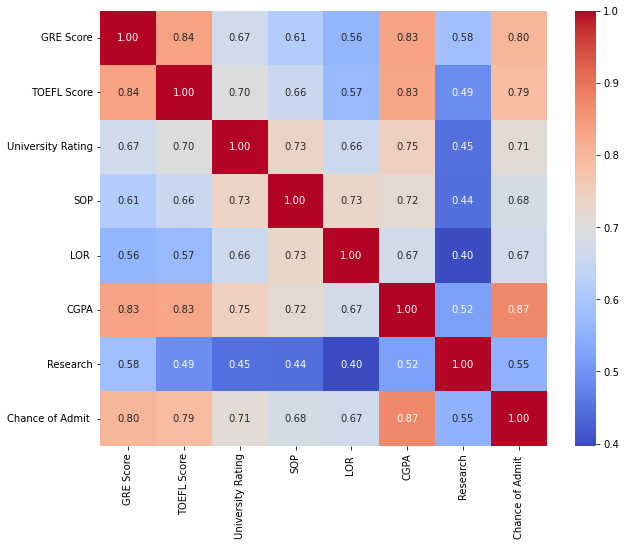

In [140]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True,cmap='coolwarm', fmt= '.2f')
plt.show()

In [147]:
# Initialize the StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaledfeature', withMean= True, withStd= True)

# Fit the scaler to the data and transform the features
scaler_model = scaler.fit(df_vector)
scaled_df = scaler_model.transform(df_vector)

# # Show the scaled feature
scaled_df.show(10)

+----+---------+-----------+-----------------+---+----+----+--------+----------------+--------------------+--------------------+
|  id|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |            features|       scaledfeature|
+----+---------+-----------+-----------------+---+----+----+--------+----------------+--------------------+--------------------+
| 1.0|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|            0.92|[337.0,118.0,4.0,...|[1.75990263254156...|
| 2.0|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|            0.76|[324.0,107.0,4.0,...|[0.62687134750798...|
| 3.0|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|            0.72|[316.0,104.0,3.0,...|[-0.0703786740511...|
| 4.0|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|             0.8|[322.0,110.0,3.0,...|[0.45255884211820...|
| 5.0|    314.0|      103.0|              2.0|2.0| 3.0|8.21|     0.0|            0.65|[314.0,103.

In [167]:
# Set the number of principal components
pca = PCA(k=3, inputCol= 'scaledfeature', outputCol='pcaFeatures')

# Fit PCA model to the data
pca_model = pca.fit(scaled_df)

# Transform the data using PCA
pca_df = pca_model.transform(scaled_df)

pca_df.show(10)

+----+---------+-----------+-----------------+---+----+----+--------+----------------+--------------------+--------------------+--------------------+
|  id|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |            features|       scaledfeature|         pcaFeatures|
+----+---------+-----------+-----------------+---+----+----+--------+----------------+--------------------+--------------------+--------------------+
| 1.0|    337.0|      118.0|              4.0|4.5| 4.5|9.65|     1.0|            0.92|[337.0,118.0,4.0,...|[1.75990263254156...|[-3.8004131321588...|
| 2.0|    324.0|      107.0|              4.0|4.0| 4.5|8.87|     1.0|            0.76|[324.0,107.0,4.0,...|[0.62687134750798...|[-1.5970956648805...|
| 3.0|    316.0|      104.0|              3.0|3.0| 3.5| 8.0|     1.0|            0.72|[316.0,104.0,3.0,...|[-0.0703786740511...|[0.54218978337491...|
| 4.0|    322.0|      110.0|              3.0|3.5| 2.5|8.67|     1.0|             0.8|[322.0,110.0,3

In [160]:
# Get the explained variance by the principal components
explained_variance = pca_model.explainedVariance.toArray()

# Print the explained variance
print(f"Explained Variance by each principal component: {explained_variance}")

Explained Variance by each principal component: [0.70918025 0.09103589 0.06969445]


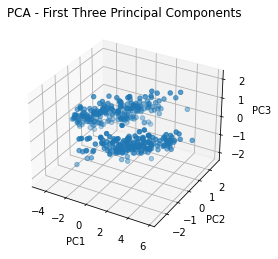

In [169]:


# Convert PCA features to Pandas DataFrame for visualization
pca_df1 = pca_df.select("pcaFeatures").toPandas()
pca_df1[['PC1', 'PC2', 'PC3']] = pd.DataFrame(pca_df1['pcaFeatures'].tolist(), index=pca_df1.index)

# 3D scatter plot of the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df1['PC1'], pca_df1['PC2'], pca_df1['PC3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA - First Three Principal Components')
plt.show()
